<a href="https://colab.research.google.com/github/PraveenPrabhat125/Python-for-Data-Analyst/blob/main/Diwali_sales_analysis_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step for EDA project
1. Import library
2. Import Data
3. Data cleaning
4. EDA
5. Observation/Conclusion


### 1. Import libraries

In [2]:
import numpy as np  # for 1d array operation
import pandas as pd # table operation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Making default Setting sns palette as bright
sns.set_palette('bright')

In [3]:
sns.set_palette('bright')

### 2. Import data

In [4]:
# encoding_options = ['utf-8', 'latin1', 'ISO-8859-1']
df = pd.read_csv('/content/Diwali Sales Data.csv', encoding= 'unicode_escape' )
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [5]:
# data observation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


1. Status, Unnamed1 have contain all null values - will drop this columns
2. Amount column have few null

In [6]:
df.shape

(11251, 15)

In [7]:
df.describe() # This only works for numerical columns data point

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


### 3. Data Cleaning
1. remove null columns
2. some amount column has misssing values

To get the count of nulls value in each columns

In [8]:
pd.isnull(df).sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

Drop Status and Unnamed columns

In [9]:
df.drop(['Status', 'unnamed1'], axis = 1)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


###  Note:
We need to use inplace = True to save the changes of drop

In [10]:
df.drop(['Status', 'unnamed1'], axis = 1, inplace = True)
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


Amount columns have some value nulls : ie. 12 values

In [12]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [13]:
print(df.shape)
df1 =df.dropna(axis = 0)

print(df1.shape) # 12 values which contain Null row get droped

(11251, 13)
(11239, 13)


In [14]:
df.dropna(inplace = True)
df.shape

(11239, 13)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


All null are removed

In [16]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610858
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


We have 5 column which is numberical only ie.
1. User_ID
2. Age
3. Marital_Status
4. Orders
5. Amount

# 4. EDA: Exploratory Data Analysis

In [17]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

### Gender

In [18]:
# sns.set_style('darkgrid')
sns.set_style('ticks')

In [19]:
sns.set_palette('bright')

<ipython-input-20-ac49f93fa889>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Gender', data = df, palette = 'bright')


<Axes: xlabel='Gender', ylabel='count'>

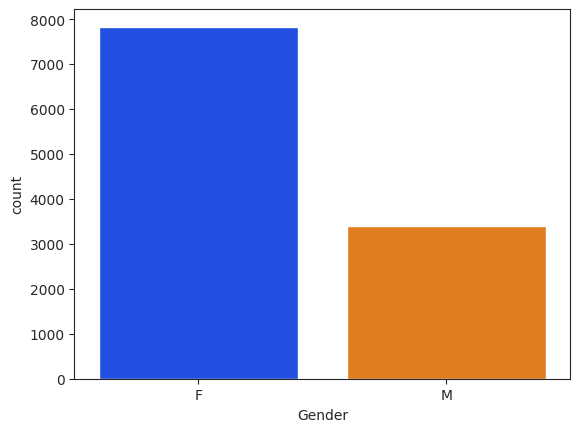

In [20]:
sns.countplot(x = 'Gender', data = df, palette = 'bright')

Let add the count on each bars

<ipython-input-21-1206fd797328>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'Gender', data = df, palette = 'bright')


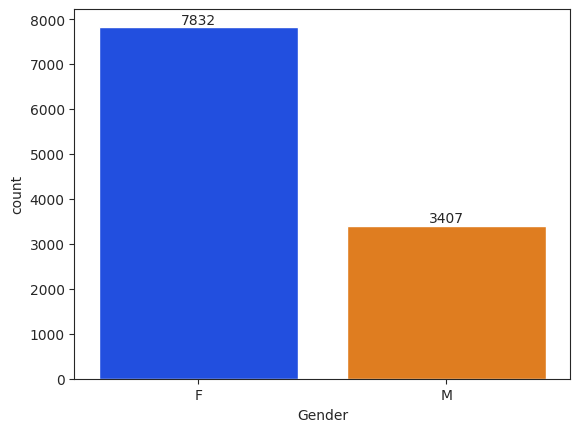

In [21]:
ax = sns.countplot(x = 'Gender', data = df, palette = 'bright')

for bars in ax.containers:
  ax.bar_label(bars)

#### gender with amount
1. We need to group by the amount on gender

<ipython-input-22-efadced0264e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = 'Gender', y = 'Amount', data  = gender_amt, palette = 'bright')


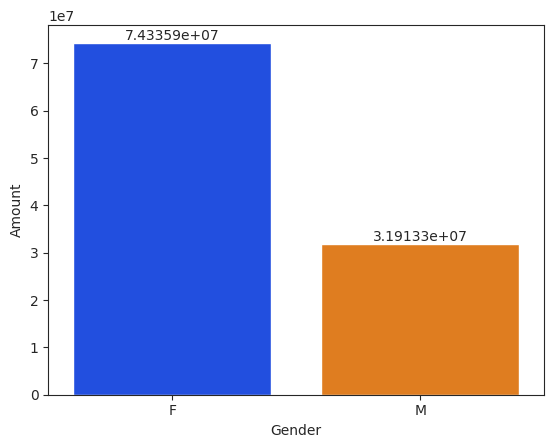

In [22]:
gender_amt = df.groupby(['Gender'], as_index = False).agg({
    'Amount': 'sum'
})
gender_amt

ax = sns.barplot(x = 'Gender', y = 'Amount', data  = gender_amt, palette = 'bright')

# lets label it
for bar in ax.containers:
  ax.bar_label(bar)

### Lets make the label bars fun() as global so that we don't have to write it again and again

In [23]:
# lets label it
def bar_label(ax):
  for bar in ax.containers:
    ax.bar_label(bar)

<ipython-input-24-a4d5d9090d84>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = 'Gender', y = 'Amount', data = gender_amt, palette= 'bright')


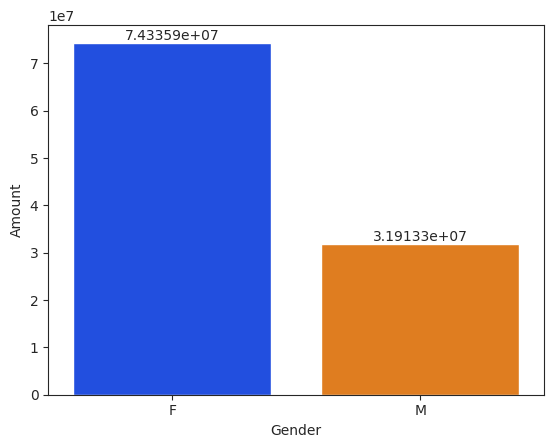

In [24]:
ax = sns.barplot(x = 'Gender', y = 'Amount', data = gender_amt, palette= 'bright')

# lets call the global function for label the data on bars
bar_label(ax)

## Insight:
1. Female have higher both on volumen and value of purchaing

In [25]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

### Age Group

<ipython-input-26-21ea2626b848>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Age Group', data = df, palette = 'bright')


<Axes: xlabel='Age Group', ylabel='count'>

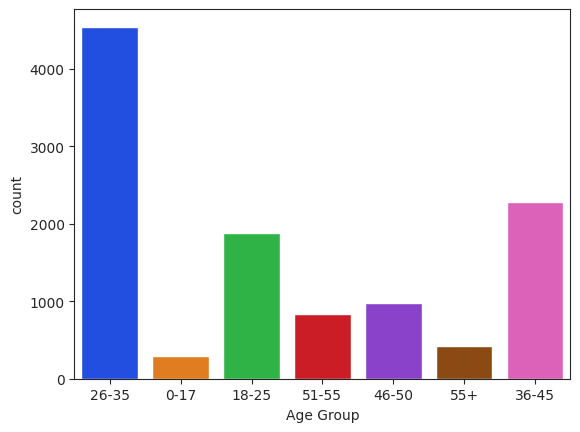

In [26]:
sns.countplot(x = 'Age Group', data = df, palette = 'bright')

#### Hue
The hue parameter in seaborn allows you to add an additional categorical variable to your plot and differentiate the data based on this variable by using different colors. It's particularly useful when you want to visualize the relationship between two variables while considering the effect of a third categorical variable

<Axes: xlabel='Age Group', ylabel='count'>

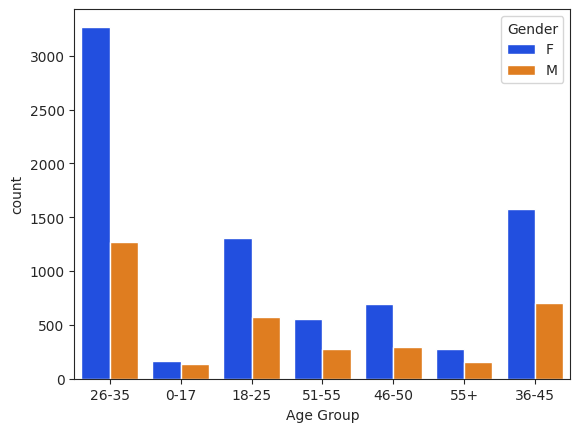

In [27]:
sns.countplot(x = 'Age Group', data = df, palette = 'bright', hue = 'Gender')

### Insight:
1. maxximum customer are of Age group of 26-36
2. lets check on age group and amount

In [28]:
age_amt = df.groupby(['Age Group'], as_index = False).agg({
    'Amount': 'sum'
})
age_amt


,Age Group,Amount
0,0-17,2699653.00
1,18-25,17240732.00
2,26-35,42613443.94
3,36-45,22144995.49
4,46-50,9207844.00
5,51-55,8261477.00
6,55+,4080987.00


In [33]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<ipython-input-38-4217af96a450>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = age_amt1, x = 'Age Group', y = 'Amount', palette = 'bright')


<Axes: xlabel='Age Group', ylabel='Amount'>

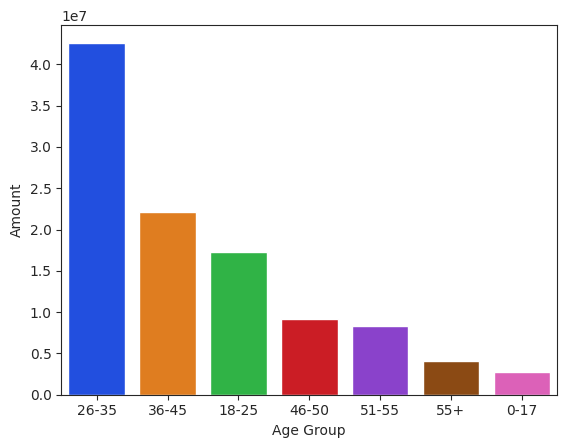

In [38]:
age_amt1 = age_amt.sort_values(by = 'Amount', ascending = False)
sns.barplot(data = age_amt1, x = 'Age Group', y = 'Amount', palette = 'bright')

### Insight
Age group of 26-35 have higher buying pepensity

In [40]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [43]:
  # age group with cound of order
age_order = df.groupby(['Age Group'], as_index = False).agg({
      'Orders': 'count'
  }).sort_values(by = 'Orders', ascending = False)
age_order

,Age Group,Orders
2,26-35,4541
3,36-45,2283
1,18-25,1879
4,46-50,983
5,51-55,830
6,55+,427
0,0-17,296


<ipython-input-45-813a9185072d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = age_order, x = 'Age Group', y = 'Orders', palette = 'bright')


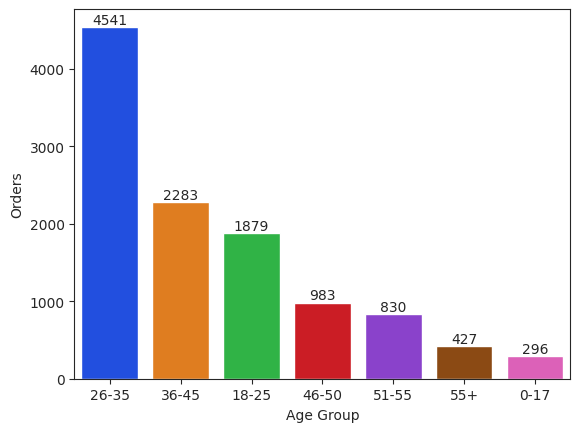

In [45]:
ax = sns.barplot(data = age_order, x = 'Age Group', y = 'Orders', palette = 'bright')

# calls global fun for bar labeling
bar_label(ax)

In [46]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

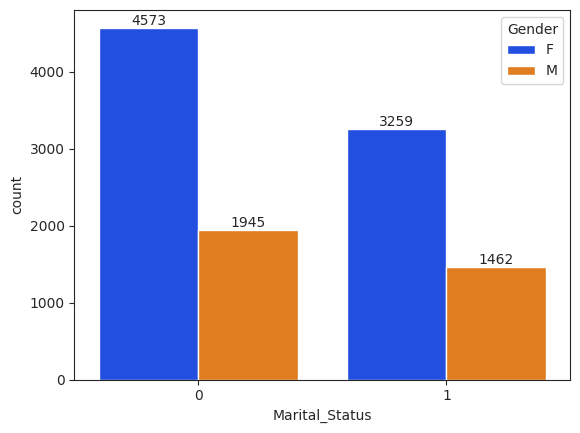

In [51]:
ax = sns.countplot(data = df, x = 'Marital_Status', hue = 'Gender', palette = 'bright')

# bar lebel
bar_label(ax)

un married female have higer count
1. marital staus -
  1. amount
  2. order count

In [55]:
Marital_Status_A_o = df.groupby(['Marital_Status'], as_index = False).agg({
    'Amount': 'sum',
    'Orders': 'count'
})

Marital_Status_A_o

,Marital_Status,Amount,Orders
0,0,62125386.44,6518
1,1,44123745.99,4721


<ipython-input-57-a997de69a825>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = Marital_Status_A_o, x = 'Marital_Status', y = 'Amount', palette = 'bright')


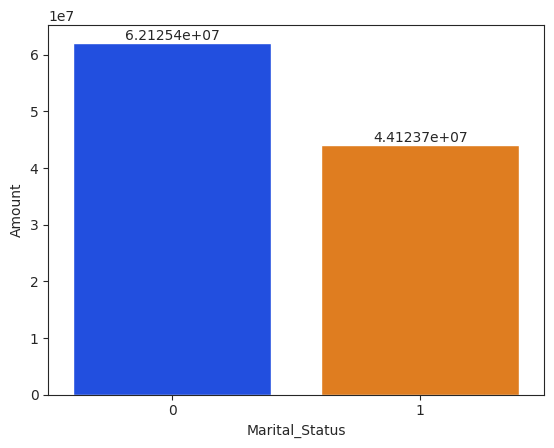

In [57]:
ax = sns.barplot(data = Marital_Status_A_o, x = 'Marital_Status', y = 'Amount', palette = 'bright')

bar_label(ax)

<ipython-input-59-4949ff60c530>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = Marital_Status_A_o, x = 'Marital_Status', y = 'Orders', palette = 'bright')


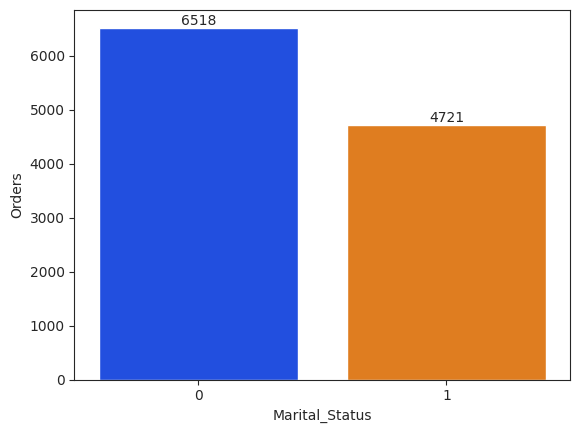

In [59]:
ax = sns.barplot(data = Marital_Status_A_o, x = 'Marital_Status', y = 'Orders', palette = 'bright')

bar_label(ax)

#Insights
- Unmarrid cusotmer have higher amount as well as count of purchase

In [60]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='Occupation', ylabel='Amount'>

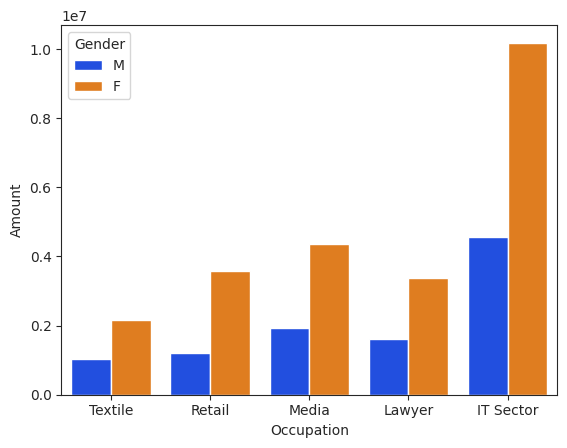

In [66]:
occ_gender = df.groupby(['Occupation', 'Gender'], as_index = False).agg({
    'Amount': 'sum',
    'Orders': 'count'
    ''
}).sort_values(by = ['Occupation', 'Gender'], ascending = False )

occ_gender = occ_gender[:10]


sns.barplot(data  = occ_gender, x = 'Occupation', y = 'Amount', hue = 'Gender', palette= 'bright')

### insight
It sector female tend to buy more products

<Axes: xlabel='Occupation', ylabel='Orders'>

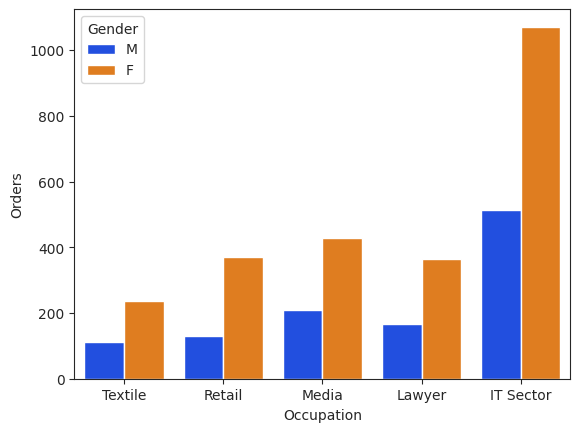

In [67]:

occ_gender = occ_gender[:10]


sns.barplot(data  = occ_gender, x = 'Occupation', y = 'Orders', hue = 'Gender', palette= 'bright')

It Sector customer has high no of purchase

In [68]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<ipython-input-77-9db3a08a3ee2>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = Product_Category_df, x = 'Product_Category', y = 'Amount', palette = 'bright' )


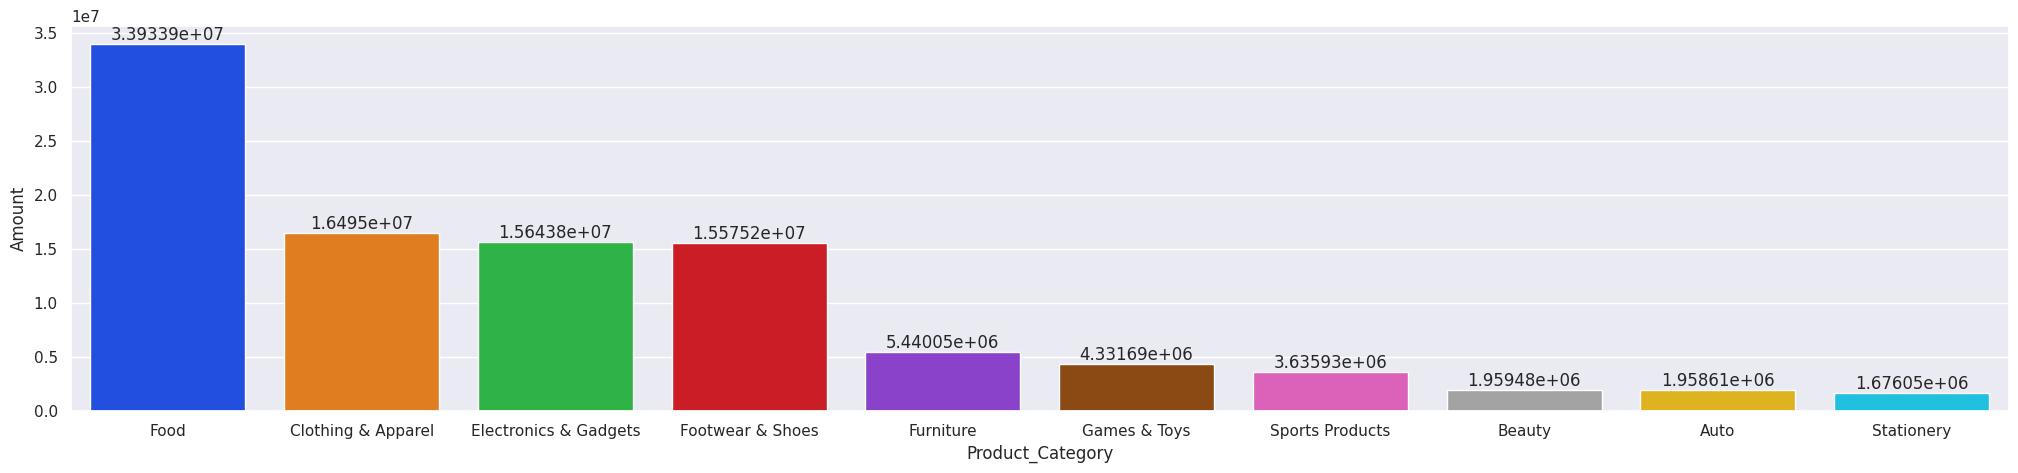

In [77]:
Product_Category_df = df.groupby(['Product_Category'], as_index = False).agg({
    'Amount': 'sum',
    'Orders': 'count'
}).sort_values(by = 'Amount', ascending = False)


Product_Category_df = Product_Category_df[:10]

sns.set(rc={'figure.figsize': (25,5)})

ax = sns.barplot(data = Product_Category_df, x = 'Product_Category', y = 'Amount', palette = 'bright' )

bar_label(ax)

### Insgiht
food product have been sold higer then any other product

<ipython-input-78-ee878d0daa5f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = Product_Category_df, x = 'Product_Category', y = 'Orders', palette = 'bright' )


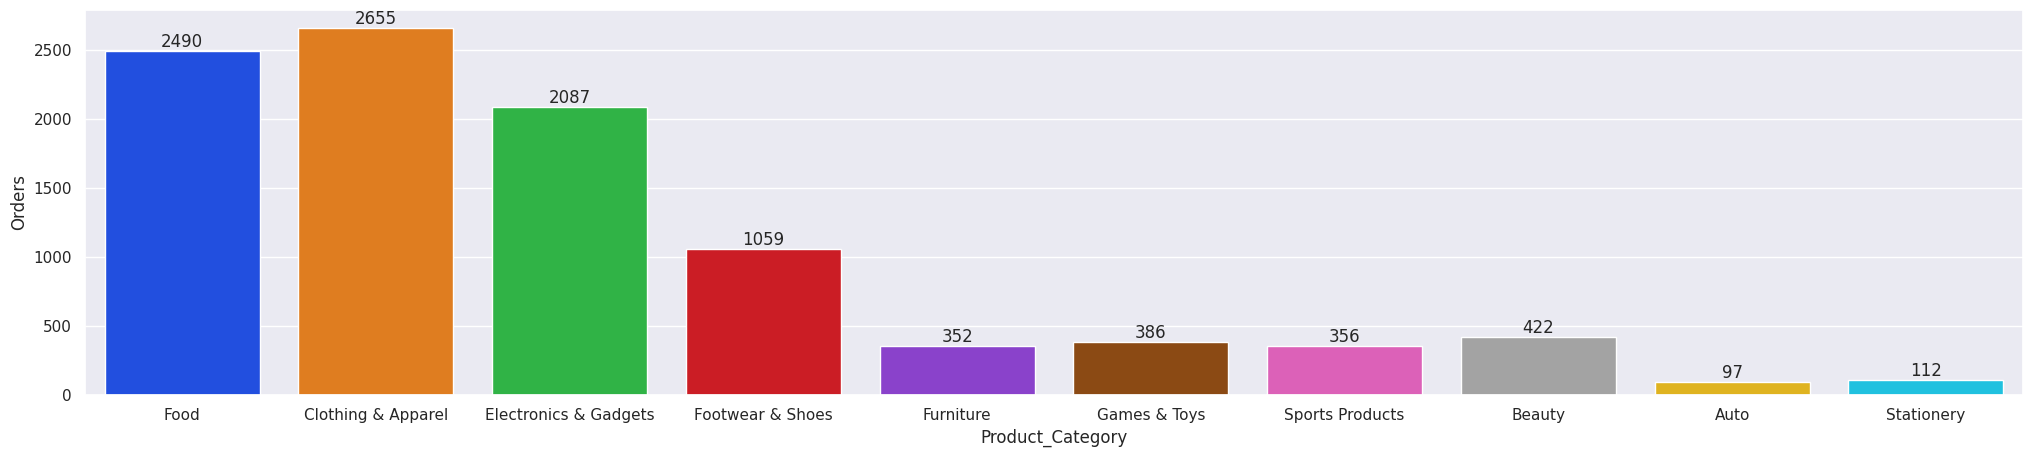

In [78]:
sns.set(rc={'figure.figsize': (25,5)})

ax = sns.barplot(data = Product_Category_df, x = 'Product_Category', y = 'Orders', palette = 'bright' )

bar_label(ax)

### Insight
The data reveals that food items, in terms of cost, have a higher total value compared to other categories. Conversely, the clothing and apparel category leads in the number of orders placed.

        Amount  Order
Amount     1.0    1.0
Order      1.0    1.0


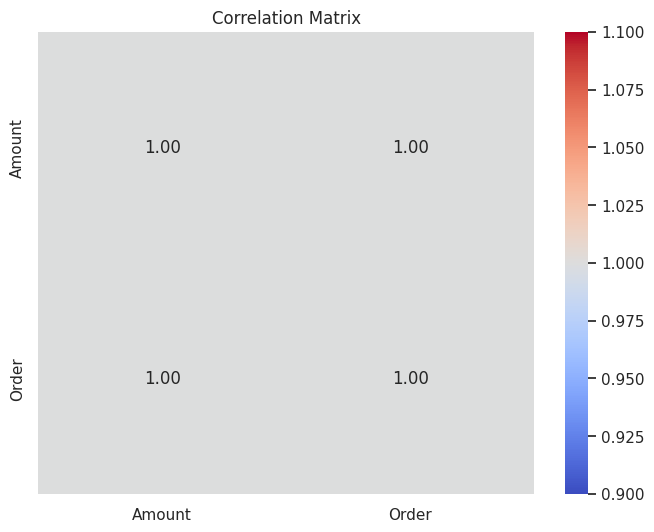

In [87]:


# Compute the correlation matrix
corr_matrix = df[[ 'Amount', 'Order']].corr()

# Display the correlation matrix
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
